In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb

In [2]:
death_under5 = pd.read_csv('data/causes_death_children_under5.csv')
death_under5

,Entity,Code,Year,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number),...,Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number),Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)",Deaths - Road injuries - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)
0,Afghanistan,AFG,1990,48,105,1779,718,431,8649,477,...,7112,2455,3968,131,802,808,10,776,21,123
1,African Region (WHO),0,1990,26869,4381,170136,3388,17987,311413,17025,...,100379,71931,686390,9165,28173,78180,67976,16651,447410,54547
2,Albania,ALB,1990,0,5,33,3,44,176,136,...,310,25,68,11,27,4,0,34,0,10
3,Algeria,DZA,1990,16,17,316,92,182,2599,239,...,3326,628,2666,217,1446,94,15,310,0,163
4,American Samoa,ASM,1990,0,0,1,0,0,2,0,...,2,1,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,World Bank Lower Middle Income,0,2019,31512,5188,34881,10748,19536,22646,19148,...,256369,60535,302100,6986,16890,24981,20756,19866,155443,38587
6836,World Bank Upper Middle Income,0,2019,324,2458,4868,273,9475,1593,4364,...,29160,3880,11628,1587,8193,1435,5222,7453,779,5750
6837,Yemen,YEM,2019,56,35,542,53,248,366,267,...,6492,901,5950,144,1124,65,86,218,64,395
6838,Zambia,ZMB,2019,45,71,986,14,399,137,243,...,1984,455,3754,92,147,251,3022,130,2496,1329


In [3]:
death_under5.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Measles - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Chronic kidney disease - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Cardiovascular diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neon

In [4]:
death_under5.Entity.nunique()

228

In [5]:
death_by_age = pd.read_csv('data/child-deaths-by-age.csv')
death_by_age

,Entity,Code,Year,Deaths - All causes - Sex: Both - Age: 7-27 days (Number),Deaths - All causes - Sex: Both - Age: 1-4 years (Number),Deaths - All causes - Sex: Both - Age: 0-6 days (Number),Deaths - All causes - Sex: Both - Age: 28-364 days (Number)
0,Afghanistan,AFG,1990,9869,21812,15560,30929
1,Afghanistan,AFG,1991,10963,21565,17665,32841
2,Afghanistan,AFG,1992,12905,21929,21124,37901
3,Afghanistan,AFG,1993,14399,24292,23522,44325
4,Afghanistan,AFG,1994,15015,28068,24633,47618
...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2564,6567,8840,8581
6836,Zimbabwe,ZWE,2016,2476,6245,8626,8152
6837,Zimbabwe,ZWE,2017,2407,6031,8478,7849
6838,Zimbabwe,ZWE,2018,2335,5745,8302,7523


In [6]:
death_by_age.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - All causes - Sex: Both - Age: 7-27 days (Number)',
       'Deaths - All causes - Sex: Both - Age: 1-4 years (Number)',
       'Deaths - All causes - Sex: Both - Age: 0-6 days (Number)',
       'Deaths - All causes - Sex: Both - Age: 28-364 days (Number)'],
      dtype='object')

In [7]:
death_by_age['Deaths - All causes - Sex: Both - Age: 1-4 years (Number)'].value_counts()

3        142
0        122
4        112
1         97
2         88
        ... 
5112       1
3063       1
5108       1
9202       1
10239      1
Name: Deaths - All causes - Sex: Both - Age: 1-4 years (Number), Length: 3802, dtype: int64

In [8]:
death_by_age['Entity'].nunique()

228

In [9]:
merged_df = death_under5.merge(death_by_age, on=['Entity', 'Code', 'Year'], how='outer')
merged_df

,Entity,Code,Year,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number),...,Deaths - Road injuries - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number),Deaths - All causes - Sex: Both - Age: 7-27 days (Number),Deaths - All causes - Sex: Both - Age: 1-4 years (Number),Deaths - All causes - Sex: Both - Age: 0-6 days (Number),Deaths - All causes - Sex: Both - Age: 28-364 days (Number)
0,Afghanistan,AFG,1990,48.0,105.0,1779.0,718.0,431.0,8649.0,477.0,...,802.0,808.0,10.0,776.0,21.0,123.0,9869.0,21812.0,15560.0,30929.0
1,African Region (WHO),0,1990,26869.0,4381.0,170136.0,3388.0,17987.0,311413.0,17025.0,...,28173.0,78180.0,67976.0,16651.0,447410.0,54547.0,NaN,NaN,NaN,NaN
2,Albania,ALB,1990,0.0,5.0,33.0,3.0,44.0,176.0,136.0,...,27.0,4.0,0.0,34.0,0.0,10.0,208.0,849.0,989.0,1524.0
3,Algeria,DZA,1990,16.0,17.0,316.0,92.0,182.0,2599.0,239.0,...,1446.0,94.0,15.0,310.0,0.0,163.0,6461.0,6742.0,13487.0,19201.0
4,American Samoa,ASM,1990,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,3.0,6.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,World Bank Upper Middle Income,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,61105.0,92670.0,220943.0,176564.0
7556,World Bank Upper Middle Income,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,58912.0,88727.0,210245.0,170228.0
7557,World Bank Upper Middle Income,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,53809.0,84805.0,190375.0,158360.0
7558,World Bank Upper Middle Income,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,49874.0,79237.0,175313.0,144154.0


In [10]:
death_by_sex = pd.read_csv('data/child-mortality-by-sex.csv')
death_by_sex

,Entity,Code,Year,"Mortality rate, under-5, female (per 1,000 live births)","Mortality rate, under-5, male (per 1,000 live births)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1961,34.370001,35.979999,9169406.0,NaN
2,Afghanistan,AFG,1962,33.810001,35.400000,9351442.0,NaN
3,Afghanistan,AFG,1963,33.250000,34.829999,9543200.0,NaN
4,Afghanistan,AFG,1964,32.729999,34.260001,9744772.0,NaN
...,...,...,...,...,...,...,...
56103,Zimbabwe,ZWE,1957,NaN,NaN,3425070.0,NaN
56104,Zimbabwe,ZWE,1958,NaN,NaN,3537167.0,NaN
56105,Zimbabwe,ZWE,1959,NaN,NaN,3654172.0,NaN
56106,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


In [11]:
merged_df2 = merged_df.merge(death_by_sex, on=['Entity', 'Code', 'Year'], how='inner')
merged_df2

,Entity,Code,Year,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number),...,Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number),Deaths - All causes - Sex: Both - Age: 7-27 days (Number),Deaths - All causes - Sex: Both - Age: 1-4 years (Number),Deaths - All causes - Sex: Both - Age: 0-6 days (Number),Deaths - All causes - Sex: Both - Age: 28-364 days (Number),"Mortality rate, under-5, female (per 1,000 live births)","Mortality rate, under-5, male (per 1,000 live births)",Population (historical estimates),Continent
0,Afghanistan,AFG,1990,48.0,105.0,1779.0,718.0,431.0,8649.0,477.0,...,21.0,123.0,9869.0,21812.0,15560.0,30929.0,17.389999,18.25,12412311.0,NaN
1,Albania,ALB,1990,0.0,5.0,33.0,3.0,44.0,176.0,136.0,...,0.0,10.0,208.0,849.0,989.0,1524.0,3.690000,4.49,3286070.0,NaN
2,Algeria,DZA,1990,16.0,17.0,316.0,92.0,182.0,2599.0,239.0,...,0.0,163.0,6461.0,6742.0,13487.0,19201.0,4.480000,5.32,25758872.0,NaN
3,American Samoa,ASM,1990,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,3.0,3.0,6.0,11.0,8.0,NaN,NaN,47351.0,NaN
4,Andorra,AND,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.270000,1.74,54508.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,Timor,TLS,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,64.0,276.0,557.0,444.0,4.590000,5.43,1196294.0,Asia
6146,Timor,TLS,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,64.0,268.0,558.0,435.0,4.430000,5.24,1219289.0,NaN
6147,Timor,TLS,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.0,254.0,547.0,416.0,4.270000,5.06,1243260.0,NaN
6148,Timor,TLS,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,62.0,244.0,542.0,404.0,4.120000,4.89,1267975.0,NaN


In [12]:
merged_df2.isna().sum()

Entity                                                                                                      0
Code                                                                                                        0
Year                                                                                                        0
Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)                      30
Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)                                        30
Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)                                      30
Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)                                               30
Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)                                                     30
Deaths - Measles - Sex: Both - Age: Under 5 (Number)                                                       30
Deaths - D

In [13]:
percent_missing = (merged_df2.isna().sum()/len(merged_df2))*100
percent_missing

Entity                                                                                                    0.000000
Code                                                                                                      0.000000
Year                                                                                                      0.000000
Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)                     0.487805
Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)                                       0.487805
Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)                                     0.487805
Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)                                              0.487805
Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)                                                    0.487805
Deaths - Measles - Sex: Both - Age: Under 5 (Number)                            

In [14]:
poverty_and_mortality = pd.read_csv('data/poverty-and-child-mortality.csv')
poverty_and_mortality

,Entity,Code,Year,"Mortality rate, under-5 (per 1,000 live births)",$1.90 per day - share of population below poverty line,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1960,35.820001,NaN,8996967.0,NaN
2,Afghanistan,AFG,1961,35.220001,NaN,9169406.0,NaN
3,Afghanistan,AFG,1962,34.629999,NaN,9351442.0,NaN
4,Afghanistan,AFG,1963,34.060001,NaN,9543200.0,NaN
...,...,...,...,...,...,...,...
56531,Zimbabwe,ZWE,1957,NaN,NaN,3425070.0,NaN
56532,Zimbabwe,ZWE,1958,NaN,NaN,3537167.0,NaN
56533,Zimbabwe,ZWE,1959,NaN,NaN,3654172.0,NaN
56534,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


In [15]:
health_expenditure_and_mortality = pd.read_csv('data/per-capita-total-expenditure-on-health-vs-child-mortality.csv')
health_expenditure_and_mortality

,Entity,Code,Year,"Mortality rate, under-5 (per 1,000 live births)","Current health expenditure per capita, PPP (current international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1960,35.820001,NaN,8996967.0,NaN
2,Afghanistan,AFG,1961,35.220001,NaN,9169406.0,NaN
3,Afghanistan,AFG,1962,34.629999,NaN,9351442.0,NaN
4,Afghanistan,AFG,1963,34.060001,NaN,9543200.0,NaN
...,...,...,...,...,...,...,...
56103,Zimbabwe,ZWE,1957,NaN,NaN,3425070.0,NaN
56104,Zimbabwe,ZWE,1958,NaN,NaN,3537167.0,NaN
56105,Zimbabwe,ZWE,1959,NaN,NaN,3654172.0,NaN
56106,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


In [16]:
merged_df3 = health_expenditure_and_mortality.merge(poverty_and_mortality, on=['Entity', 'Code', 'Year'], how='outer')
merged_df3

,Entity,Code,Year,"Mortality rate, under-5 (per 1,000 live births)_x","Current health expenditure per capita, PPP (current international $)",Population (historical estimates)_x,Continent_x,"Mortality rate, under-5 (per 1,000 live births)_y",$1.90 per day - share of population below poverty line,Population (historical estimates)_y,Continent_y
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1960,35.820001,NaN,8996967.0,NaN,35.820001,NaN,8996967.0,NaN
2,Afghanistan,AFG,1961,35.220001,NaN,9169406.0,NaN,35.220001,NaN,9169406.0,NaN
3,Afghanistan,AFG,1962,34.629999,NaN,9351442.0,NaN,34.629999,NaN,9351442.0,NaN
4,Afghanistan,AFG,1963,34.060001,NaN,9543200.0,NaN,34.060001,NaN,9543200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
56531,Suriname (Urban),NaN,2015,NaN,NaN,NaN,NaN,NaN,17.11924,NaN,NaN
56532,Suriname (Urban),NaN,2016,NaN,NaN,NaN,NaN,NaN,17.53247,NaN,NaN
56533,Suriname (Urban),NaN,2017,NaN,NaN,NaN,NaN,NaN,17.53247,NaN,NaN
56534,Suriname (Urban),NaN,2018,NaN,NaN,NaN,NaN,NaN,17.53247,NaN,NaN


In [17]:
merged_df3.columns

Index(['Entity', 'Code', 'Year',
       'Mortality rate, under-5 (per 1,000 live births)_x',
       'Current health expenditure per capita, PPP (current international $)',
       'Population (historical estimates)_x', 'Continent_x',
       'Mortality rate, under-5 (per 1,000 live births)_y',
       '$1.90 per day - share of population below poverty line',
       'Population (historical estimates)_y', 'Continent_y'],
      dtype='object')

In [18]:
unique_columns = [col for col in merged_df3.columns if not col.endswith('_y')]
merged_df3_unique = merged_df3[unique_columns]
merged_df3_unique

,Entity,Code,Year,"Mortality rate, under-5 (per 1,000 live births)_x","Current health expenditure per capita, PPP (current international $)",Population (historical estimates)_x,Continent_x,$1.90 per day - share of population below poverty line
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia,NaN
1,Afghanistan,AFG,1960,35.820001,NaN,8996967.0,NaN,NaN
2,Afghanistan,AFG,1961,35.220001,NaN,9169406.0,NaN,NaN
3,Afghanistan,AFG,1962,34.629999,NaN,9351442.0,NaN,NaN
4,Afghanistan,AFG,1963,34.060001,NaN,9543200.0,NaN,NaN
...,...,...,...,...,...,...,...,...
56531,Suriname (Urban),NaN,2015,NaN,NaN,NaN,NaN,17.11924
56532,Suriname (Urban),NaN,2016,NaN,NaN,NaN,NaN,17.53247
56533,Suriname (Urban),NaN,2017,NaN,NaN,NaN,NaN,17.53247
56534,Suriname (Urban),NaN,2018,NaN,NaN,NaN,NaN,17.53247


In [19]:
# Drop the specified columns
merged_df3_unique = merged_df3_unique.drop(['Population (historical estimates)_x', 'Continent_x'], axis=1)

In [20]:
main_df = merged_df2.merge(merged_df3_unique, on=['Entity', 'Code', 'Year'], how='inner')
main_df

,Entity,Code,Year,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number),...,Deaths - All causes - Sex: Both - Age: 1-4 years (Number),Deaths - All causes - Sex: Both - Age: 0-6 days (Number),Deaths - All causes - Sex: Both - Age: 28-364 days (Number),"Mortality rate, under-5, female (per 1,000 live births)","Mortality rate, under-5, male (per 1,000 live births)",Population (historical estimates),Continent,"Mortality rate, under-5 (per 1,000 live births)_x","Current health expenditure per capita, PPP (current international $)",$1.90 per day - share of population below poverty line
0,Afghanistan,AFG,1990,48.0,105.0,1779.0,718.0,431.0,8649.0,477.0,...,21812.0,15560.0,30929.0,17.389999,18.25,12412311.0,NaN,17.839999,NaN,NaN
1,Albania,ALB,1990,0.0,5.0,33.0,3.0,44.0,176.0,136.0,...,849.0,989.0,1524.0,3.690000,4.49,3286070.0,NaN,4.100000,NaN,0.960586
2,Algeria,DZA,1990,16.0,17.0,316.0,92.0,182.0,2599.0,239.0,...,6742.0,13487.0,19201.0,4.480000,5.32,25758872.0,NaN,4.910000,NaN,5.051997
3,American Samoa,ASM,1990,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,6.0,11.0,8.0,NaN,NaN,47351.0,NaN,NaN,NaN,NaN
4,Andorra,AND,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.270000,1.74,54508.0,NaN,1.510000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,Timor,TLS,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,276.0,557.0,444.0,4.590000,5.43,1196294.0,Asia,5.020000,223.410873,23.829370
6146,Timor,TLS,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,268.0,558.0,435.0,4.430000,5.24,1219289.0,NaN,4.840000,215.943512,22.279650
6147,Timor,TLS,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,254.0,547.0,416.0,4.270000,5.06,1243260.0,NaN,4.680000,212.113510,21.575600
6148,Timor,TLS,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,244.0,542.0,404.0,4.120000,4.89,1267975.0,NaN,4.510000,237.957001,21.821520


## Data Cleaning

In [21]:
main_df.isna().sum()

Entity                                                                                                      0
Code                                                                                                        0
Year                                                                                                        0
Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)                      30
Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)                                        30
Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)                                      30
Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)                                               30
Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)                                                     30
Deaths - Measles - Sex: Both - Age: Under 5 (Number)                                                       30
Deaths - D

In [22]:
main_df.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Measles - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Chronic kidney disease - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Cardiovascular diseases - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neon

In [23]:
# Cleaning the column names
new_column_names = {
    'Entity': 'entity',
    'Code': 'code',
    'Year': 'year',
    'Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)': 'salmonella',
    'Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)': 'interpersonal_violence',
    'Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)': 'nutritional_deficiencies',
    'Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)': 'acute_hepatitis',
    'Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)': 'neoplasms',
    'Deaths - Measles - Sex: Both - Age: Under 5 (Number)': 'measles',
    'Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number)': 'digestive_diseases',
    'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number)': 'cirrhosis_and_chronic_liver_diseases',
    'Deaths - Chronic kidney disease - Sex: Both - Age: Under 5 (Number)': 'chronic_kidney_disease',
    'Deaths - Cardiovascular diseases - Sex: Both - Age: Under 5 (Number)': 'cardiovascular_diseases',
    'Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number)': 'congenital_birth_defects',
    'Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)': 'lower_respiratory_infections',
    'Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number)': 'neonatal_preterm_birth',
    'Deaths - Environmental heat and cold exposure - Sex: Both - Age: Under 5 (Number)': 'environmental_heat_cold_exposure',
    'Deaths - Neonatal sepsis and other neonatal infections - Sex: Both - Age: Under 5 (Number)': 'neonatal_sepsis_and_neonatal_infections',
    'Deaths - Exposure to forces of nature - Sex: Both - Age: Under 5 (Number)': 'exposure_to_forces_of_nature',
    'Deaths - Diabetes mellitus - Sex: Both - Age: Under 5 (Number)': 'diabetes_mellitus',
    'Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number)': 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
    'Deaths - Meningitis - Sex: Both - Age: Under 5 (Number)': 'meningitis',
    'Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number)': 'other_neonatal_disorders',
    'Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number)': 'whooping_cough',
    'Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number)': 'diarrheal_diseases',
    'Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)': 'fire_heat_and_hot_substances',
    'Deaths - Road injuries - Sex: Both - Age: Under 5 (Number)': 'road_injuries',
    'Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number)': 'tuberculosis',
    'Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)': 'hiv/aids',
    'Deaths - Drowning - Sex: Both - Age: Under 5 (Number)': 'drowning',
    'Deaths - Malaria - Sex: Both - Age: Under 5 (Number)': 'malaria',
    'Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)': 'syphilis',
    'Deaths - All causes - Sex: Both - Age: 7-27 days (Number)': 'deaths_7_27_days',
    'Deaths - All causes - Sex: Both - Age: 1-4 years (Number)': 'deaths_1_4_years',
    'Deaths - All causes - Sex: Both - Age: 0-6 days (Number)': 'deaths_0_6_days',
    'Deaths - All causes - Sex: Both - Age: 28-364 days (Number)': 'deaths_28_364_days',
    'Mortality rate, under-5, female (per 1,000 live births)': 'under_5_female_mortality',
    'Mortality rate, under-5, male (per 1,000 live births)': 'under_5_male_mortality',
    'Population (historical estimates)': 'population',
    'Continent': 'continent',
    'Mortality rate, under-5 (per 1,000 live births)_x': 'under_5_total_mortality',
    'Current health expenditure per capita, PPP (current international $)': 'health_expenditure_per_capita',
    '$1.90 per day - share of population below poverty line': 'pop_below_poverty_line',
}

df = main_df.rename(columns=new_column_names)
df

,entity,code,year,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line
0,Afghanistan,AFG,1990,48.0,105.0,1779.0,718.0,431.0,8649.0,477.0,...,21812.0,15560.0,30929.0,17.389999,18.25,12412311.0,NaN,17.839999,NaN,NaN
1,Albania,ALB,1990,0.0,5.0,33.0,3.0,44.0,176.0,136.0,...,849.0,989.0,1524.0,3.690000,4.49,3286070.0,NaN,4.100000,NaN,0.960586
2,Algeria,DZA,1990,16.0,17.0,316.0,92.0,182.0,2599.0,239.0,...,6742.0,13487.0,19201.0,4.480000,5.32,25758872.0,NaN,4.910000,NaN,5.051997
3,American Samoa,ASM,1990,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,6.0,11.0,8.0,NaN,NaN,47351.0,NaN,NaN,NaN,NaN
4,Andorra,AND,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.270000,1.74,54508.0,NaN,1.510000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,Timor,TLS,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,276.0,557.0,444.0,4.590000,5.43,1196294.0,Asia,5.020000,223.410873,23.829370
6146,Timor,TLS,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,268.0,558.0,435.0,4.430000,5.24,1219289.0,NaN,4.840000,215.943512,22.279650
6147,Timor,TLS,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,254.0,547.0,416.0,4.270000,5.06,1243260.0,NaN,4.680000,212.113510,21.575600
6148,Timor,TLS,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,244.0,542.0,404.0,4.120000,4.89,1267975.0,NaN,4.510000,237.957001,21.821520


In [24]:
df.columns

Index(['entity', 'code', 'year', 'salmonella', 'interpersonal_violence',
       'nutritional_deficiencies', 'acute_hepatitis', 'neoplasms', 'measles',
       'digestive_diseases', 'cirrhosis_and_chronic_liver_diseases',
       'chronic_kidney_disease', 'cardiovascular_diseases',
       'congenital_birth_defects', 'lower_respiratory_infections',
       'neonatal_preterm_birth', 'environmental_heat_cold_exposure',
       'neonatal_sepsis_and_neonatal_infections',
       'exposure_to_forces_of_nature', 'diabetes_mellitus',
       'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
       'meningitis', 'other_neonatal_disorders', 'whooping_cough',
       'diarrheal_diseases', 'fire_heat_and_hot_substances', 'road_injuries',
       'tuberculosis', 'hiv/aids', 'drowning', 'malaria', 'syphilis',
       'deaths_7_27_days', 'deaths_1_4_years', 'deaths_0_6_days',
       'deaths_28_364_days', 'under_5_female_mortality',
       'under_5_male_mortality', 'population', 'continent',
       'u

In [25]:
df.isna().sum()

entity                                                         0
code                                                           0
year                                                           0
salmonella                                                    30
interpersonal_violence                                        30
nutritional_deficiencies                                      30
acute_hepatitis                                               30
neoplasms                                                     30
measles                                                       30
digestive_diseases                                            30
cirrhosis_and_chronic_liver_diseases                          30
chronic_kidney_disease                                        30
cardiovascular_diseases                                       30
congenital_birth_defects                                      30
lower_respiratory_infections                                  30
neonatal_preterm_birth   

In [26]:
df_missing = (df.isna().sum()/len(df))*100
df_missing

entity                                                       0.000000
code                                                         0.000000
year                                                         0.000000
salmonella                                                   0.487805
interpersonal_violence                                       0.487805
nutritional_deficiencies                                     0.487805
acute_hepatitis                                              0.487805
neoplasms                                                    0.487805
measles                                                      0.487805
digestive_diseases                                           0.487805
cirrhosis_and_chronic_liver_diseases                         0.487805
chronic_kidney_disease                                       0.487805
cardiovascular_diseases                                      0.487805
congenital_birth_defects                                     0.487805
lower_respiratory_in

Most of the columns have very low percentage of missing values. As such, the missing values can be dealt with without dropping the columns.

For the continent column which has 96% of values missing, the column can be filled accurately by referring to geogrpahical information on the continent of each country 

In [27]:
#Installing the country_converter library to use it to get the continent information
!pip install country_converter

In [28]:
#Import the country coverter library
import country_converter as coco

# Define a country converter object
cc = coco.CountryConverter()

# Define a dictionary to map countries/regions to continents
country_to_continent = {country: cc.convert(names=country, to='continent') for country in df['entity'].unique()}

# Map the continents to the 'entity' column in your DataFrame
df['continent'] = df['entity'].map(country_to_continent)

# Display the DataFrame to verify the changes
df


World not found in regex
Timor not found in regex


,entity,code,year,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line
0,Afghanistan,AFG,1990,48.0,105.0,1779.0,718.0,431.0,8649.0,477.0,...,21812.0,15560.0,30929.0,17.389999,18.25,12412311.0,Asia,17.839999,NaN,NaN
1,Albania,ALB,1990,0.0,5.0,33.0,3.0,44.0,176.0,136.0,...,849.0,989.0,1524.0,3.690000,4.49,3286070.0,Europe,4.100000,NaN,0.960586
2,Algeria,DZA,1990,16.0,17.0,316.0,92.0,182.0,2599.0,239.0,...,6742.0,13487.0,19201.0,4.480000,5.32,25758872.0,Africa,4.910000,NaN,5.051997
3,American Samoa,ASM,1990,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,6.0,11.0,8.0,NaN,NaN,47351.0,Oceania,NaN,NaN,NaN
4,Andorra,AND,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.270000,1.74,54508.0,Europe,1.510000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,Timor,TLS,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,276.0,557.0,444.0,4.590000,5.43,1196294.0,not found,5.020000,223.410873,23.829370
6146,Timor,TLS,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,268.0,558.0,435.0,4.430000,5.24,1219289.0,not found,4.840000,215.943512,22.279650
6147,Timor,TLS,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,254.0,547.0,416.0,4.270000,5.06,1243260.0,not found,4.680000,212.113510,21.575600
6148,Timor,TLS,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,244.0,542.0,404.0,4.120000,4.89,1267975.0,not found,4.510000,237.957001,21.821520


In [29]:
#Check the value counts of continent column
df.continent.value_counts()

Africa       1620
Asia         1440
Europe       1260
America      1170
Oceania       600
not found      60
Name: continent, dtype: int64

In [30]:
# Filter the DataFrame to display rows with 'not found' continent
not_found_rows = df[df['continent'] == 'not found']

# Display the filtered DataFrame
not_found_rows

,entity,code,year,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line
200,World,OWID_WRL,1990,29986.0,21223.0,524103.0,50184.0,85197.0,704288.0,77952.0,...,3857335.0,3026068.0,3832898.0,9.050000,9.580000,5.327529e+09,not found,9.320000,NaN,36.216580
404,World,OWID_WRL,1991,30578.0,21221.0,498575.0,48663.0,84005.0,694354.0,76096.0,...,3789276.0,3010842.0,3763264.0,8.930000,9.440000,5.414289e+09,not found,9.200000,NaN,36.037690
608,World,OWID_WRL,1992,31357.0,21212.0,473637.0,47054.0,82272.0,685081.0,73730.0,...,3685497.0,2999846.0,3649786.0,8.810000,9.310000,5.498920e+09,not found,9.070000,NaN,35.068650
812,World,OWID_WRL,1993,32353.0,21044.0,452037.0,45853.0,80413.0,665170.0,71036.0,...,3599462.0,2976122.0,3546336.0,8.700000,9.180000,5.581598e+09,not found,8.950000,NaN,34.281570
1016,World,OWID_WRL,1994,33378.0,20490.0,433745.0,44864.0,78307.0,650795.0,68090.0,...,3595802.0,2951812.0,3478889.0,8.600000,9.060000,5.663150e+09,not found,8.840000,NaN,33.204450
1220,World,OWID_WRL,1995,34369.0,20213.0,440460.0,43708.0,75976.0,639200.0,65150.0,...,3437115.0,2938805.0,3386221.0,8.420000,8.860000,5.744213e+09,not found,8.650000,NaN,31.323880
1424,World,OWID_WRL,1996,35564.0,19611.0,433921.0,41659.0,73325.0,621941.0,62204.0,...,3350455.0,2909348.0,3309045.0,8.250000,8.680000,5.824892e+09,not found,8.480000,NaN,29.717560
1628,World,OWID_WRL,1997,37089.0,18965.0,413517.0,40048.0,70998.0,600996.0,59870.0,...,3260129.0,2890372.0,3210101.0,8.060000,8.480000,5.905046e+09,not found,8.280000,NaN,29.553100
1832,World,OWID_WRL,1998,38805.0,18596.0,391914.0,38381.0,68525.0,579599.0,57504.0,...,3176499.0,2872759.0,3116019.0,7.850000,8.270000,5.984794e+09,not found,8.070000,NaN,29.888850
2036,World,OWID_WRL,1999,40828.0,18149.0,371472.0,37066.0,66285.0,552526.0,55466.0,...,3083232.0,2851313.0,3023327.0,7.620000,8.050000,6.064239e+09,not found,7.840000,NaN,28.844130


In [31]:
# Locate the rows where the 'entity' column is 'Timor' and replace 'continent' value with 'Asia'
df.loc[df['entity'] == 'Timor', 'continent'] = 'Asia'

# Display the DataFrame to verify the changes
df

,entity,code,year,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line
0,Afghanistan,AFG,1990,48.0,105.0,1779.0,718.0,431.0,8649.0,477.0,...,21812.0,15560.0,30929.0,17.389999,18.25,12412311.0,Asia,17.839999,NaN,NaN
1,Albania,ALB,1990,0.0,5.0,33.0,3.0,44.0,176.0,136.0,...,849.0,989.0,1524.0,3.690000,4.49,3286070.0,Europe,4.100000,NaN,0.960586
2,Algeria,DZA,1990,16.0,17.0,316.0,92.0,182.0,2599.0,239.0,...,6742.0,13487.0,19201.0,4.480000,5.32,25758872.0,Africa,4.910000,NaN,5.051997
3,American Samoa,ASM,1990,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,6.0,11.0,8.0,NaN,NaN,47351.0,Oceania,NaN,NaN,NaN
4,Andorra,AND,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.270000,1.74,54508.0,Europe,1.510000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,Timor,TLS,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,276.0,557.0,444.0,4.590000,5.43,1196294.0,Asia,5.020000,223.410873,23.829370
6146,Timor,TLS,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,268.0,558.0,435.0,4.430000,5.24,1219289.0,Asia,4.840000,215.943512,22.279650
6147,Timor,TLS,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,254.0,547.0,416.0,4.270000,5.06,1243260.0,Asia,4.680000,212.113510,21.575600
6148,Timor,TLS,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,244.0,542.0,404.0,4.120000,4.89,1267975.0,Asia,4.510000,237.957001,21.821520


In [32]:
#Recheck the value counts of continent column
df.continent.value_counts()

Africa       1620
Asia         1470
Europe       1260
America      1170
Oceania       600
not found      30
Name: continent, dtype: int64

In [33]:
# Replace 'not found' with NaN (null) in the 'continent' column
df['continent'].replace('not found', pd.NA, inplace=True)

# Display the updated value counts
df.continent.value_counts(dropna=False)

Africa     1620
Asia       1470
Europe     1260
America    1170
Oceania     600
NaN          30
Name: continent, dtype: int64

In [34]:
df['entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'G

In [35]:
# Filter the DataFrame to display rows with 'World' in entity
world_rows = df[df['entity'] == 'World']

# Display the filtered DataFrame
world_rows

,entity,code,year,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line
200,World,OWID_WRL,1990,29986.0,21223.0,524103.0,50184.0,85197.0,704288.0,77952.0,...,3857335.0,3026068.0,3832898.0,9.05,9.58,5.327529e+09,<NA>,9.32,NaN,36.216580
404,World,OWID_WRL,1991,30578.0,21221.0,498575.0,48663.0,84005.0,694354.0,76096.0,...,3789276.0,3010842.0,3763264.0,8.93,9.44,5.414289e+09,<NA>,9.20,NaN,36.037690
608,World,OWID_WRL,1992,31357.0,21212.0,473637.0,47054.0,82272.0,685081.0,73730.0,...,3685497.0,2999846.0,3649786.0,8.81,9.31,5.498920e+09,<NA>,9.07,NaN,35.068650
812,World,OWID_WRL,1993,32353.0,21044.0,452037.0,45853.0,80413.0,665170.0,71036.0,...,3599462.0,2976122.0,3546336.0,8.70,9.18,5.581598e+09,<NA>,8.95,NaN,34.281570
1016,World,OWID_WRL,1994,33378.0,20490.0,433745.0,44864.0,78307.0,650795.0,68090.0,...,3595802.0,2951812.0,3478889.0,8.60,9.06,5.663150e+09,<NA>,8.84,NaN,33.204450
1220,World,OWID_WRL,1995,34369.0,20213.0,440460.0,43708.0,75976.0,639200.0,65150.0,...,3437115.0,2938805.0,3386221.0,8.42,8.86,5.744213e+09,<NA>,8.65,NaN,31.323880
1424,World,OWID_WRL,1996,35564.0,19611.0,433921.0,41659.0,73325.0,621941.0,62204.0,...,3350455.0,2909348.0,3309045.0,8.25,8.68,5.824892e+09,<NA>,8.48,NaN,29.717560
1628,World,OWID_WRL,1997,37089.0,18965.0,413517.0,40048.0,70998.0,600996.0,59870.0,...,3260129.0,2890372.0,3210101.0,8.06,8.48,5.905046e+09,<NA>,8.28,NaN,29.553100
1832,World,OWID_WRL,1998,38805.0,18596.0,391914.0,38381.0,68525.0,579599.0,57504.0,...,3176499.0,2872759.0,3116019.0,7.85,8.27,5.984794e+09,<NA>,8.07,NaN,29.888850
2036,World,OWID_WRL,1999,40828.0,18149.0,371472.0,37066.0,66285.0,552526.0,55466.0,...,3083232.0,2851313.0,3023327.0,7.62,8.05,6.064239e+09,<NA>,7.84,NaN,28.844130


We'll retain the world rows dataframe as is for exploratory data analysis and drop these rows from the main dataset because the world is a collective entity and cannot be compared to single country entities. 

We will however retain this data in a different dataset as it has exploratory value and we can use it to derive the global averages. 

In [36]:
# Drop rows where the value in the 'entity' column is 'World'
df_new = df[df['entity'] != 'World']

# Display the DataFrame after dropping the rows
df_new

,entity,code,year,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line
0,Afghanistan,AFG,1990,48.0,105.0,1779.0,718.0,431.0,8649.0,477.0,...,21812.0,15560.0,30929.0,17.389999,18.25,12412311.0,Asia,17.839999,NaN,NaN
1,Albania,ALB,1990,0.0,5.0,33.0,3.0,44.0,176.0,136.0,...,849.0,989.0,1524.0,3.690000,4.49,3286070.0,Europe,4.100000,NaN,0.960586
2,Algeria,DZA,1990,16.0,17.0,316.0,92.0,182.0,2599.0,239.0,...,6742.0,13487.0,19201.0,4.480000,5.32,25758872.0,Africa,4.910000,NaN,5.051997
3,American Samoa,ASM,1990,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,6.0,11.0,8.0,NaN,NaN,47351.0,Oceania,NaN,NaN,NaN
4,Andorra,AND,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.270000,1.74,54508.0,Europe,1.510000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,Timor,TLS,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,276.0,557.0,444.0,4.590000,5.43,1196294.0,Asia,5.020000,223.410873,23.829370
6146,Timor,TLS,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,268.0,558.0,435.0,4.430000,5.24,1219289.0,Asia,4.840000,215.943512,22.279650
6147,Timor,TLS,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,254.0,547.0,416.0,4.270000,5.06,1243260.0,Asia,4.680000,212.113510,21.575600
6148,Timor,TLS,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,244.0,542.0,404.0,4.120000,4.89,1267975.0,Asia,4.510000,237.957001,21.821520


In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6120 entries, 0 to 6149
Data columns (total 43 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   entity                                                    6120 non-null   object 
 1   code                                                      6120 non-null   object 
 2   year                                                      6120 non-null   int64  
 3   salmonella                                                6090 non-null   float64
 4   interpersonal_violence                                    6090 non-null   float64
 5   nutritional_deficiencies                                  6090 non-null   float64
 6   acute_hepatitis                                           6090 non-null   float64
 7   neoplasms                                                 6090 non-null   float64
 8   measles           

In [38]:
df_new.columns

Index(['entity', 'code', 'year', 'salmonella', 'interpersonal_violence',
       'nutritional_deficiencies', 'acute_hepatitis', 'neoplasms', 'measles',
       'digestive_diseases', 'cirrhosis_and_chronic_liver_diseases',
       'chronic_kidney_disease', 'cardiovascular_diseases',
       'congenital_birth_defects', 'lower_respiratory_infections',
       'neonatal_preterm_birth', 'environmental_heat_cold_exposure',
       'neonatal_sepsis_and_neonatal_infections',
       'exposure_to_forces_of_nature', 'diabetes_mellitus',
       'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
       'meningitis', 'other_neonatal_disorders', 'whooping_cough',
       'diarrheal_diseases', 'fire_heat_and_hot_substances', 'road_injuries',
       'tuberculosis', 'hiv/aids', 'drowning', 'malaria', 'syphilis',
       'deaths_7_27_days', 'deaths_1_4_years', 'deaths_0_6_days',
       'deaths_28_364_days', 'under_5_female_mortality',
       'under_5_male_mortality', 'population', 'continent',
       'u

In [39]:
df_not_null = df_new.dropna()
df_not_null

,entity,code,year,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line
2041,Albania,ALB,2000,0.0,4.0,18.0,0.0,26.0,1.0,37.0,...,285.0,708.0,627.0,2.400000,3.030000,3129246.0,Europe,2.720000,275.797180,2.600918
2042,Algeria,DZA,2000,20.0,14.0,162.0,48.0,145.0,404.0,180.0,...,4102.0,11334.0,9706.0,3.670000,4.250000,31042238.0,Africa,3.970000,294.703308,5.280372
2045,Angola,AGO,2000,493.0,88.0,7779.0,130.0,459.0,5199.0,486.0,...,50844.0,19670.0,36467.0,19.260001,21.560001,16395476.0,Africa,20.439999,62.695866,36.541180
2048,Armenia,ARM,2000,0.0,1.0,1.0,1.0,21.0,0.0,16.0,...,154.0,535.0,475.0,2.730000,3.370000,3069597.0,Asia,3.060000,111.539314,13.605250
2049,Australia,AUS,2000,0.0,17.0,1.0,1.0,51.0,0.0,8.0,...,264.0,691.0,423.0,0.550000,0.680000,18991434.0,Oceania,0.620000,2155.341553,0.680699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,Uzbekistan,UZB,2019,1.0,9.0,7.0,22.0,170.0,0.0,109.0,...,2627.0,5434.0,4713.0,1.280000,1.680000,32981714.0,Asia,1.480000,418.013458,10.677090
6113,Vanuatu,VUT,2019,0.0,0.0,4.0,0.0,2.0,4.0,1.0,...,41.0,66.0,56.0,2.350000,2.760000,299882.0,Oceania,2.560000,110.640900,14.161530
6115,Vietnam,VNM,2019,21.0,18.0,46.0,4.0,270.0,177.0,182.0,...,3823.0,7105.0,4043.0,1.740000,2.460000,96462108.0,Asia,2.110000,558.872986,1.352212
6118,Zambia,ZMB,2019,45.0,71.0,986.0,14.0,399.0,137.0,243.0,...,9226.0,10326.0,9194.0,5.890000,6.900000,17861034.0,Africa,6.410000,192.515564,58.521120


In [40]:
df_not_null['pop_below_poverty_line'].value_counts(dropna=False)

0.000000     175
2.713015      10
0.058987       9
0.479826       9
0.104123       8
            ... 
8.464172       1
48.616500      1
11.371020      1
0.117307       1
0.310916       1
Name: pop_below_poverty_line, Length: 2835, dtype: int64

### Defining Target Variable 

Our first approach is to define out target variable risk_of_mortality as any entity with a mortality rate above the 75th percentile of the under_5_total_mortality. 

Any entity above the threshold will have a positive risk of mortality while entities below that will have a negative risk of mortality. 

In [41]:
#Drop any null values in the under_5_total_mortality column
df_threshold = df.dropna(subset=['under_5_total_mortality'])

# Define threshold as 75th percentile)
threshold = df_threshold['under_5_total_mortality'].quantile(0.75)

# Determine high and low risk
df_threshold['risk_of_mortality'] = df_threshold['under_5_total_mortality'].apply(lambda x: 1 if x > threshold else 0)

#Previewing the df_threshold to review the changes
df_threshold

<ipython-input-41-64f578cab797>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_threshold['risk_of_mortality'] = df_threshold['under_5_total_mortality'].apply(lambda x: 1 if x > threshold else 0)


,entity,code,year,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,...,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line,risk_of_mortality
0,Afghanistan,AFG,1990,48.0,105.0,1779.0,718.0,431.0,8649.0,477.0,...,15560.0,30929.0,17.389999,18.25,12412311.0,Asia,17.839999,NaN,NaN,1
1,Albania,ALB,1990,0.0,5.0,33.0,3.0,44.0,176.0,136.0,...,989.0,1524.0,3.690000,4.49,3286070.0,Europe,4.100000,NaN,0.960586,0
2,Algeria,DZA,1990,16.0,17.0,316.0,92.0,182.0,2599.0,239.0,...,13487.0,19201.0,4.480000,5.32,25758872.0,Africa,4.910000,NaN,5.051997,0
4,Andorra,AND,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.270000,1.74,54508.0,Europe,1.510000,NaN,NaN,0
5,Angola,AGO,1990,255.0,62.0,10013.0,121.0,335.0,5331.0,370.0,...,15769.0,31715.0,21.089999,23.40,11848385.0,Africa,22.280000,NaN,28.831050,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,Timor,TLS,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,557.0,444.0,4.590000,5.43,1196294.0,Asia,5.020000,223.410873,23.829370,0
6146,Timor,TLS,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,558.0,435.0,4.430000,5.24,1219289.0,Asia,4.840000,215.943512,22.279650,0
6147,Timor,TLS,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,547.0,416.0,4.270000,5.06,1243260.0,Asia,4.680000,212.113510,21.575600,0
6148,Timor,TLS,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,542.0,404.0,4.120000,4.89,1267975.0,Asia,4.510000,237.957001,21.821520,0


In [42]:
df_threshold.drop(columns=['under_5_total_mortality'], axis=1, inplace=True)
df_threshold.head()

C:\Users\Carol\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,entity,code,year,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,health_expenditure_per_capita,pop_below_poverty_line,risk_of_mortality
0,Afghanistan,AFG,1990,48.0,105.0,1779.0,718.0,431.0,8649.0,477.0,...,21812.0,15560.0,30929.0,17.389999,18.25,12412311.0,Asia,NaN,NaN,1
1,Albania,ALB,1990,0.0,5.0,33.0,3.0,44.0,176.0,136.0,...,849.0,989.0,1524.0,3.690000,4.49,3286070.0,Europe,NaN,0.960586,0
2,Algeria,DZA,1990,16.0,17.0,316.0,92.0,182.0,2599.0,239.0,...,6742.0,13487.0,19201.0,4.480000,5.32,25758872.0,Africa,NaN,5.051997,0
4,Andorra,AND,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.270000,1.74,54508.0,Europe,NaN,NaN,0
5,Angola,AGO,1990,255.0,62.0,10013.0,121.0,335.0,5331.0,370.0,...,46399.0,15769.0,31715.0,21.089999,23.40,11848385.0,Africa,NaN,28.831050,1


In [43]:
df_threshold.columns

Index(['entity', 'code', 'year', 'salmonella', 'interpersonal_violence',
       'nutritional_deficiencies', 'acute_hepatitis', 'neoplasms', 'measles',
       'digestive_diseases', 'cirrhosis_and_chronic_liver_diseases',
       'chronic_kidney_disease', 'cardiovascular_diseases',
       'congenital_birth_defects', 'lower_respiratory_infections',
       'neonatal_preterm_birth', 'environmental_heat_cold_exposure',
       'neonatal_sepsis_and_neonatal_infections',
       'exposure_to_forces_of_nature', 'diabetes_mellitus',
       'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
       'meningitis', 'other_neonatal_disorders', 'whooping_cough',
       'diarrheal_diseases', 'fire_heat_and_hot_substances', 'road_injuries',
       'tuberculosis', 'hiv/aids', 'drowning', 'malaria', 'syphilis',
       'deaths_7_27_days', 'deaths_1_4_years', 'deaths_0_6_days',
       'deaths_28_364_days', 'under_5_female_mortality',
       'under_5_male_mortality', 'population', 'continent',
       'h

In [44]:
df_threshold['risk_of_mortality'].value_counts(dropna=False)

0    4366
1    1454
Name: risk_of_mortality, dtype: int64

There is some class imbalance that needs to be addressed in the target variable. 

#### First Simple Model

In [45]:
# Step 1: Data Preparation for first simple model
df_fsm = df_threshold.dropna()

In [46]:
# Train-Test Split
X = df_fsm.drop(columns=['entity', 'code', 'year', 'continent', 'risk_of_mortality'])  # Features
y = df_fsm['risk_of_mortality']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Step 3: Model Selection
model = LogisticRegression()  # Using Logistic Regression as a simple classification model

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)

C:\Users\Carol\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9322834645669291

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       474
           1       0.93      0.80      0.86       161

    accuracy                           0.93       635
   macro avg       0.93      0.89      0.91       635
weighted avg       0.93      0.93      0.93       635



#### Second Approach

The second approach is to combine year and country code and year into one entity and use it as an instance then carry out KMeans clustering to come up with the risk

In [49]:
df_model = df.copy()

In [50]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6150 entries, 0 to 6149
Data columns (total 43 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   entity                                                    6150 non-null   object 
 1   code                                                      6150 non-null   object 
 2   year                                                      6150 non-null   int64  
 3   salmonella                                                6120 non-null   float64
 4   interpersonal_violence                                    6120 non-null   float64
 5   nutritional_deficiencies                                  6120 non-null   float64
 6   acute_hepatitis                                           6120 non-null   float64
 7   neoplasms                                                 6120 non-null   float64
 8   measles           

In [51]:
df_model = df_model.dropna()
df_model

,entity,code,year,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line
2041,Albania,ALB,2000,0.0,4.0,18.0,0.0,26.0,1.0,37.0,...,285.0,708.0,627.0,2.400000,3.030000,3129246.0,Europe,2.720000,275.797180,2.600918
2042,Algeria,DZA,2000,20.0,14.0,162.0,48.0,145.0,404.0,180.0,...,4102.0,11334.0,9706.0,3.670000,4.250000,31042238.0,Africa,3.970000,294.703308,5.280372
2045,Angola,AGO,2000,493.0,88.0,7779.0,130.0,459.0,5199.0,486.0,...,50844.0,19670.0,36467.0,19.260001,21.560001,16395476.0,Africa,20.439999,62.695866,36.541180
2048,Armenia,ARM,2000,0.0,1.0,1.0,1.0,21.0,0.0,16.0,...,154.0,535.0,475.0,2.730000,3.370000,3069597.0,Asia,3.060000,111.539314,13.605250
2049,Australia,AUS,2000,0.0,17.0,1.0,1.0,51.0,0.0,8.0,...,264.0,691.0,423.0,0.550000,0.680000,18991434.0,Oceania,0.620000,2155.341553,0.680699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,Uzbekistan,UZB,2019,1.0,9.0,7.0,22.0,170.0,0.0,109.0,...,2627.0,5434.0,4713.0,1.280000,1.680000,32981714.0,Asia,1.480000,418.013458,10.677090
6113,Vanuatu,VUT,2019,0.0,0.0,4.0,0.0,2.0,4.0,1.0,...,41.0,66.0,56.0,2.350000,2.760000,299882.0,Oceania,2.560000,110.640900,14.161530
6115,Vietnam,VNM,2019,21.0,18.0,46.0,4.0,270.0,177.0,182.0,...,3823.0,7105.0,4043.0,1.740000,2.460000,96462108.0,Asia,2.110000,558.872986,1.352212
6118,Zambia,ZMB,2019,45.0,71.0,986.0,14.0,399.0,137.0,243.0,...,9226.0,10326.0,9194.0,5.890000,6.900000,17861034.0,Africa,6.410000,192.515564,58.521120


In [52]:
# creating a new column of instances
df_model['instance'] = df_model['code'].str.lower() + df_model['year'].astype(str)

# Display the DataFrame to verify the new column
df_model


,entity,code,year,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,...,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line,instance
2041,Albania,ALB,2000,0.0,4.0,18.0,0.0,26.0,1.0,37.0,...,708.0,627.0,2.400000,3.030000,3129246.0,Europe,2.720000,275.797180,2.600918,alb2000
2042,Algeria,DZA,2000,20.0,14.0,162.0,48.0,145.0,404.0,180.0,...,11334.0,9706.0,3.670000,4.250000,31042238.0,Africa,3.970000,294.703308,5.280372,dza2000
2045,Angola,AGO,2000,493.0,88.0,7779.0,130.0,459.0,5199.0,486.0,...,19670.0,36467.0,19.260001,21.560001,16395476.0,Africa,20.439999,62.695866,36.541180,ago2000
2048,Armenia,ARM,2000,0.0,1.0,1.0,1.0,21.0,0.0,16.0,...,535.0,475.0,2.730000,3.370000,3069597.0,Asia,3.060000,111.539314,13.605250,arm2000
2049,Australia,AUS,2000,0.0,17.0,1.0,1.0,51.0,0.0,8.0,...,691.0,423.0,0.550000,0.680000,18991434.0,Oceania,0.620000,2155.341553,0.680699,aus2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,Uzbekistan,UZB,2019,1.0,9.0,7.0,22.0,170.0,0.0,109.0,...,5434.0,4713.0,1.280000,1.680000,32981714.0,Asia,1.480000,418.013458,10.677090,uzb2019
6113,Vanuatu,VUT,2019,0.0,0.0,4.0,0.0,2.0,4.0,1.0,...,66.0,56.0,2.350000,2.760000,299882.0,Oceania,2.560000,110.640900,14.161530,vut2019
6115,Vietnam,VNM,2019,21.0,18.0,46.0,4.0,270.0,177.0,182.0,...,7105.0,4043.0,1.740000,2.460000,96462108.0,Asia,2.110000,558.872986,1.352212,vnm2019
6118,Zambia,ZMB,2019,45.0,71.0,986.0,14.0,399.0,137.0,243.0,...,10326.0,9194.0,5.890000,6.900000,17861034.0,Africa,6.410000,192.515564,58.521120,zmb2019


In [53]:
# Drop the 'entity', 'code', and 'year' columns
df_model.drop(columns=['entity', 'code', 'year'], inplace=True)

# Display the DataFrame to verify the changes
df_model


,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,cirrhosis_and_chronic_liver_diseases,chronic_kidney_disease,cardiovascular_diseases,...,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line,instance
2041,0.0,4.0,18.0,0.0,26.0,1.0,37.0,4.0,5.0,41.0,...,708.0,627.0,2.400000,3.030000,3129246.0,Europe,2.720000,275.797180,2.600918,alb2000
2042,20.0,14.0,162.0,48.0,145.0,404.0,180.0,70.0,89.0,368.0,...,11334.0,9706.0,3.670000,4.250000,31042238.0,Africa,3.970000,294.703308,5.280372,dza2000
2045,493.0,88.0,7779.0,130.0,459.0,5199.0,486.0,98.0,136.0,416.0,...,19670.0,36467.0,19.260001,21.560001,16395476.0,Africa,20.439999,62.695866,36.541180,ago2000
2048,0.0,1.0,1.0,1.0,21.0,0.0,16.0,1.0,1.0,1.0,...,535.0,475.0,2.730000,3.370000,3069597.0,Asia,3.060000,111.539314,13.605250,arm2000
2049,0.0,17.0,1.0,1.0,51.0,0.0,8.0,1.0,2.0,20.0,...,691.0,423.0,0.550000,0.680000,18991434.0,Oceania,0.620000,2155.341553,0.680699,aus2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,1.0,9.0,7.0,22.0,170.0,0.0,109.0,21.0,20.0,22.0,...,5434.0,4713.0,1.280000,1.680000,32981714.0,Asia,1.480000,418.013458,10.677090,uzb2019
6113,0.0,0.0,4.0,0.0,2.0,4.0,1.0,0.0,0.0,2.0,...,66.0,56.0,2.350000,2.760000,299882.0,Oceania,2.560000,110.640900,14.161530,vut2019
6115,21.0,18.0,46.0,4.0,270.0,177.0,182.0,30.0,56.0,203.0,...,7105.0,4043.0,1.740000,2.460000,96462108.0,Asia,2.110000,558.872986,1.352212,vnm2019
6118,45.0,71.0,986.0,14.0,399.0,137.0,243.0,51.0,52.0,126.0,...,10326.0,9194.0,5.890000,6.900000,17861034.0,Africa,6.410000,192.515564,58.521120,zmb2019


In [54]:
#Set the instance as the index column
df_model.set_index('instance', inplace=True)
df_model

,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,cirrhosis_and_chronic_liver_diseases,chronic_kidney_disease,cardiovascular_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line
instance,,,,,,,,,,,,,,,,,,,,,
alb2000,0.0,4.0,18.0,0.0,26.0,1.0,37.0,4.0,5.0,41.0,...,285.0,708.0,627.0,2.400000,3.030000,3129246.0,Europe,2.720000,275.797180,2.600918
dza2000,20.0,14.0,162.0,48.0,145.0,404.0,180.0,70.0,89.0,368.0,...,4102.0,11334.0,9706.0,3.670000,4.250000,31042238.0,Africa,3.970000,294.703308,5.280372
ago2000,493.0,88.0,7779.0,130.0,459.0,5199.0,486.0,98.0,136.0,416.0,...,50844.0,19670.0,36467.0,19.260001,21.560001,16395476.0,Africa,20.439999,62.695866,36.541180
arm2000,0.0,1.0,1.0,1.0,21.0,0.0,16.0,1.0,1.0,1.0,...,154.0,535.0,475.0,2.730000,3.370000,3069597.0,Asia,3.060000,111.539314,13.605250
aus2000,0.0,17.0,1.0,1.0,51.0,0.0,8.0,1.0,2.0,20.0,...,264.0,691.0,423.0,0.550000,0.680000,18991434.0,Oceania,0.620000,2155.341553,0.680699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uzb2019,1.0,9.0,7.0,22.0,170.0,0.0,109.0,21.0,20.0,22.0,...,2627.0,5434.0,4713.0,1.280000,1.680000,32981714.0,Asia,1.480000,418.013458,10.677090
vut2019,0.0,0.0,4.0,0.0,2.0,4.0,1.0,0.0,0.0,2.0,...,41.0,66.0,56.0,2.350000,2.760000,299882.0,Oceania,2.560000,110.640900,14.161530
vnm2019,21.0,18.0,46.0,4.0,270.0,177.0,182.0,30.0,56.0,203.0,...,3823.0,7105.0,4043.0,1.740000,2.460000,96462108.0,Asia,2.110000,558.872986,1.352212


In [55]:
df_model.columns

Index(['salmonella', 'interpersonal_violence', 'nutritional_deficiencies',
       'acute_hepatitis', 'neoplasms', 'measles', 'digestive_diseases',
       'cirrhosis_and_chronic_liver_diseases', 'chronic_kidney_disease',
       'cardiovascular_diseases', 'congenital_birth_defects',
       'lower_respiratory_infections', 'neonatal_preterm_birth',
       'environmental_heat_cold_exposure',
       'neonatal_sepsis_and_neonatal_infections',
       'exposure_to_forces_of_nature', 'diabetes_mellitus',
       'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
       'meningitis', 'other_neonatal_disorders', 'whooping_cough',
       'diarrheal_diseases', 'fire_heat_and_hot_substances', 'road_injuries',
       'tuberculosis', 'hiv/aids', 'drowning', 'malaria', 'syphilis',
       'deaths_7_27_days', 'deaths_1_4_years', 'deaths_0_6_days',
       'deaths_28_364_days', 'under_5_female_mortality',
       'under_5_male_mortality', 'population', 'continent',
       'under_5_total_mortality', '

In [56]:
# Drop the 'continent' column
df_model.drop(columns=['continent'], inplace=True)

# Data preprocessing: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_model)

In [57]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
df_pca = pca.fit_transform(df_scaled)

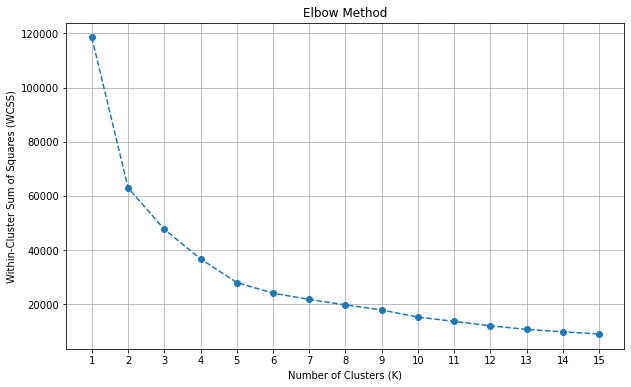

In [58]:
# Elbow method: Calculate WCSS for different values of K
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()

In [59]:
# Choose the number of clusters (K) based on the elbow method illustrated above
k = 3

# Apply KMeans clustering with the chosen value of K
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [60]:
# Add cluster labels to the DataFrame
df_model['cluster'] = kmeans.labels_
df_model

,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,cirrhosis_and_chronic_liver_diseases,chronic_kidney_disease,cardiovascular_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line,cluster
instance,,,,,,,,,,,,,,,,,,,,,
alb2000,0.0,4.0,18.0,0.0,26.0,1.0,37.0,4.0,5.0,41.0,...,285.0,708.0,627.0,2.400000,3.030000,3129246.0,2.720000,275.797180,2.600918,0
dza2000,20.0,14.0,162.0,48.0,145.0,404.0,180.0,70.0,89.0,368.0,...,4102.0,11334.0,9706.0,3.670000,4.250000,31042238.0,3.970000,294.703308,5.280372,0
ago2000,493.0,88.0,7779.0,130.0,459.0,5199.0,486.0,98.0,136.0,416.0,...,50844.0,19670.0,36467.0,19.260001,21.560001,16395476.0,20.439999,62.695866,36.541180,2
arm2000,0.0,1.0,1.0,1.0,21.0,0.0,16.0,1.0,1.0,1.0,...,154.0,535.0,475.0,2.730000,3.370000,3069597.0,3.060000,111.539314,13.605250,0
aus2000,0.0,17.0,1.0,1.0,51.0,0.0,8.0,1.0,2.0,20.0,...,264.0,691.0,423.0,0.550000,0.680000,18991434.0,0.620000,2155.341553,0.680699,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uzb2019,1.0,9.0,7.0,22.0,170.0,0.0,109.0,21.0,20.0,22.0,...,2627.0,5434.0,4713.0,1.280000,1.680000,32981714.0,1.480000,418.013458,10.677090,0
vut2019,0.0,0.0,4.0,0.0,2.0,4.0,1.0,0.0,0.0,2.0,...,41.0,66.0,56.0,2.350000,2.760000,299882.0,2.560000,110.640900,14.161530,0
vnm2019,21.0,18.0,46.0,4.0,270.0,177.0,182.0,30.0,56.0,203.0,...,3823.0,7105.0,4043.0,1.740000,2.460000,96462108.0,2.110000,558.872986,1.352212,0


In [61]:
# Analyze the clusters
df_model['cluster'].value_counts()

0    2517
2     618
1      40
Name: cluster, dtype: int64

In [62]:
df_model.columns

Index(['salmonella', 'interpersonal_violence', 'nutritional_deficiencies',
       'acute_hepatitis', 'neoplasms', 'measles', 'digestive_diseases',
       'cirrhosis_and_chronic_liver_diseases', 'chronic_kidney_disease',
       'cardiovascular_diseases', 'congenital_birth_defects',
       'lower_respiratory_infections', 'neonatal_preterm_birth',
       'environmental_heat_cold_exposure',
       'neonatal_sepsis_and_neonatal_infections',
       'exposure_to_forces_of_nature', 'diabetes_mellitus',
       'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
       'meningitis', 'other_neonatal_disorders', 'whooping_cough',
       'diarrheal_diseases', 'fire_heat_and_hot_substances', 'road_injuries',
       'tuberculosis', 'hiv/aids', 'drowning', 'malaria', 'syphilis',
       'deaths_7_27_days', 'deaths_1_4_years', 'deaths_0_6_days',
       'deaths_28_364_days', 'under_5_female_mortality',
       'under_5_male_mortality', 'population', 'under_5_total_mortality',
       'health_expend

In [63]:
# Data Preparation
X = df_model.drop(columns=['cluster'])  # Features
y = df_model['cluster']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# 3. Multiclass Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [65]:
# Evaluate Logistic Regression
print("Multiclass Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Multiclass Logistic Regression:
Accuracy: 0.84251968503937
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91       490
           1       0.12      0.71      0.21         7
           2       0.68      0.86      0.76       138

    accuracy                           0.84       635
   macro avg       0.59      0.81      0.62       635
weighted avg       0.91      0.84      0.87       635



In [66]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [67]:
# Evaluate Random Forest
print("\nRandom Forest without SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest without SMOTE:
Accuracy: 0.9984251968503937
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00         7
           2       1.00      0.99      1.00       138

    accuracy                           1.00       635
   macro avg       1.00      1.00      1.00       635
weighted avg       1.00      1.00      1.00       635



In [68]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
top_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)
print("\nTop 10 Important Features:")
print(top_features)


Top 10 Important Features:
                         Feature  Importance
30              deaths_1_4_years    0.145548
18                    meningitis    0.129646
21            diarrheal_diseases    0.086836
24                  tuberculosis    0.085842
20                whooping_cough    0.063275
32            deaths_28_364_days    0.058326
11  lower_respiratory_infections    0.056474
2       nutritional_deficiencies    0.045363
3                acute_hepatitis    0.030964
5                        measles    0.029435


In [69]:
# Random Forest with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_resampled, y_resampled)
y_pred_rf_smote = rf_model_smote.predict(X_test)


In [70]:
# Evaluate Random Forest with SMOTE
print("\nRandom Forest with SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_smote))



Random Forest with SMOTE:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00       138

    accuracy                           1.00       635
   macro avg       1.00      1.00      1.00       635
weighted avg       1.00      1.00      1.00       635



In [71]:
# 6. XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(df_model['cluster'].unique()))
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [72]:
# Evaluate XGBoost
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost:
Accuracy: 0.9984251968503937
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00         7
           2       1.00      0.99      1.00       138

    accuracy                           1.00       635
   macro avg       1.00      1.00      1.00       635
weighted avg       1.00      1.00      1.00       635



In [73]:
df_model.columns

Index(['salmonella', 'interpersonal_violence', 'nutritional_deficiencies',
       'acute_hepatitis', 'neoplasms', 'measles', 'digestive_diseases',
       'cirrhosis_and_chronic_liver_diseases', 'chronic_kidney_disease',
       'cardiovascular_diseases', 'congenital_birth_defects',
       'lower_respiratory_infections', 'neonatal_preterm_birth',
       'environmental_heat_cold_exposure',
       'neonatal_sepsis_and_neonatal_infections',
       'exposure_to_forces_of_nature', 'diabetes_mellitus',
       'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
       'meningitis', 'other_neonatal_disorders', 'whooping_cough',
       'diarrheal_diseases', 'fire_heat_and_hot_substances', 'road_injuries',
       'tuberculosis', 'hiv/aids', 'drowning', 'malaria', 'syphilis',
       'deaths_7_27_days', 'deaths_1_4_years', 'deaths_0_6_days',
       'deaths_28_364_days', 'under_5_female_mortality',
       'under_5_male_mortality', 'population', 'under_5_total_mortality',
       'health_expend

In [74]:
df_model2 = df_model.drop(columns=['cluster'], axis=1)

In [75]:
df_model2

,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,cirrhosis_and_chronic_liver_diseases,chronic_kidney_disease,cardiovascular_diseases,...,deaths_7_27_days,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line
instance,,,,,,,,,,,,,,,,,,,,,
alb2000,0.0,4.0,18.0,0.0,26.0,1.0,37.0,4.0,5.0,41.0,...,137.0,285.0,708.0,627.0,2.400000,3.030000,3129246.0,2.720000,275.797180,2.600918
dza2000,20.0,14.0,162.0,48.0,145.0,404.0,180.0,70.0,89.0,368.0,...,4224.0,4102.0,11334.0,9706.0,3.670000,4.250000,31042238.0,3.970000,294.703308,5.280372
ago2000,493.0,88.0,7779.0,130.0,459.0,5199.0,486.0,98.0,136.0,416.0,...,9060.0,50844.0,19670.0,36467.0,19.260001,21.560001,16395476.0,20.439999,62.695866,36.541180
arm2000,0.0,1.0,1.0,1.0,21.0,0.0,16.0,1.0,1.0,1.0,...,126.0,154.0,535.0,475.0,2.730000,3.370000,3069597.0,3.060000,111.539314,13.605250
aus2000,0.0,17.0,1.0,1.0,51.0,0.0,8.0,1.0,2.0,20.0,...,171.0,264.0,691.0,423.0,0.550000,0.680000,18991434.0,0.620000,2155.341553,0.680699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uzb2019,1.0,9.0,7.0,22.0,170.0,0.0,109.0,21.0,20.0,22.0,...,2467.0,2627.0,5434.0,4713.0,1.280000,1.680000,32981714.0,1.480000,418.013458,10.677090
vut2019,0.0,0.0,4.0,0.0,2.0,4.0,1.0,0.0,0.0,2.0,...,22.0,41.0,66.0,56.0,2.350000,2.760000,299882.0,2.560000,110.640900,14.161530
vnm2019,21.0,18.0,46.0,4.0,270.0,177.0,182.0,30.0,56.0,203.0,...,2098.0,3823.0,7105.0,4043.0,1.740000,2.460000,96462108.0,2.110000,558.872986,1.352212


In [76]:
# Standardize the features
scaler = StandardScaler()
df_model2_scaled = scaler.fit_transform(df_model2)

In [77]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(df_model2_scaled)

In [78]:
# Assign labels to clusters
# Calculate centroid for each cluster
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_model2.columns)

# Determine which cluster represents high-risk and low-risk based on centroid values 
high_risk_cluster = 1 if cluster_centers['under_5_total_mortality'].iloc[1] > cluster_centers['under_5_total_mortality'].iloc[0] else 0

In [79]:
# Step 4: Create binary target variable
df_model2['risk_of_mortality'] = cluster_labels
df_model2['risk_of_mortality'] = df_model2['risk_of_mortality'].apply(lambda x: 1 if x == high_risk_cluster else 0)

In [80]:
df_model2['risk_of_mortality'].value_counts()

0    3134
1      41
Name: risk_of_mortality, dtype: int64

In [81]:
# Step 5: Use remaining features to predict risk of mortality
# Prepare data for modeling
X_classification = df_model2.drop(columns=['risk_of_mortality'], axis=1)
y_classification = df_model2['risk_of_mortality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)


In [82]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = rf_classifier.predict(X_test)

In [83]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       628
           1       1.00      1.00      1.00         7

    accuracy                           1.00       635
   macro avg       1.00      1.00      1.00       635
weighted avg       1.00      1.00      1.00       635



#### Clustering without PCA then carrying out PCA after clustering

In [84]:
df_model.columns

Index(['salmonella', 'interpersonal_violence', 'nutritional_deficiencies',
       'acute_hepatitis', 'neoplasms', 'measles', 'digestive_diseases',
       'cirrhosis_and_chronic_liver_diseases', 'chronic_kidney_disease',
       'cardiovascular_diseases', 'congenital_birth_defects',
       'lower_respiratory_infections', 'neonatal_preterm_birth',
       'environmental_heat_cold_exposure',
       'neonatal_sepsis_and_neonatal_infections',
       'exposure_to_forces_of_nature', 'diabetes_mellitus',
       'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
       'meningitis', 'other_neonatal_disorders', 'whooping_cough',
       'diarrheal_diseases', 'fire_heat_and_hot_substances', 'road_injuries',
       'tuberculosis', 'hiv/aids', 'drowning', 'malaria', 'syphilis',
       'deaths_7_27_days', 'deaths_1_4_years', 'deaths_0_6_days',
       'deaths_28_364_days', 'under_5_female_mortality',
       'under_5_male_mortality', 'population', 'under_5_total_mortality',
       'health_expend

In [85]:
df3 = df_model.drop(columns=['cluster'], axis=1)

In [86]:
# Data preprocessing: Standardize the data
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3)

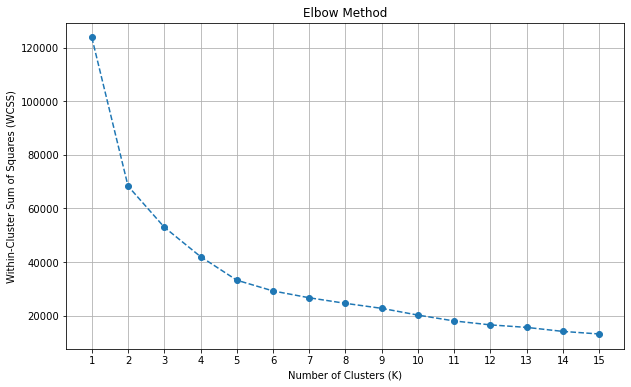

In [87]:
# Find the optimal K using the Elbow method
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df3_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()

In [88]:
# Choose the number of clusters (K) based on the elbow method illustrated above
k = 3

# Apply KMeans clustering with the chosen value of K
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df3_scaled)

KMeans(n_clusters=3, random_state=42)

In [89]:
# Add cluster labels to the DataFrame
df3['cluster'] = kmeans.labels_
df3

,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,cirrhosis_and_chronic_liver_diseases,chronic_kidney_disease,cardiovascular_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line,cluster
instance,,,,,,,,,,,,,,,,,,,,,
alb2000,0.0,4.0,18.0,0.0,26.0,1.0,37.0,4.0,5.0,41.0,...,285.0,708.0,627.0,2.400000,3.030000,3129246.0,2.720000,275.797180,2.600918,0
dza2000,20.0,14.0,162.0,48.0,145.0,404.0,180.0,70.0,89.0,368.0,...,4102.0,11334.0,9706.0,3.670000,4.250000,31042238.0,3.970000,294.703308,5.280372,0
ago2000,493.0,88.0,7779.0,130.0,459.0,5199.0,486.0,98.0,136.0,416.0,...,50844.0,19670.0,36467.0,19.260001,21.560001,16395476.0,20.439999,62.695866,36.541180,2
arm2000,0.0,1.0,1.0,1.0,21.0,0.0,16.0,1.0,1.0,1.0,...,154.0,535.0,475.0,2.730000,3.370000,3069597.0,3.060000,111.539314,13.605250,0
aus2000,0.0,17.0,1.0,1.0,51.0,0.0,8.0,1.0,2.0,20.0,...,264.0,691.0,423.0,0.550000,0.680000,18991434.0,0.620000,2155.341553,0.680699,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uzb2019,1.0,9.0,7.0,22.0,170.0,0.0,109.0,21.0,20.0,22.0,...,2627.0,5434.0,4713.0,1.280000,1.680000,32981714.0,1.480000,418.013458,10.677090,0
vut2019,0.0,0.0,4.0,0.0,2.0,4.0,1.0,0.0,0.0,2.0,...,41.0,66.0,56.0,2.350000,2.760000,299882.0,2.560000,110.640900,14.161530,0
vnm2019,21.0,18.0,46.0,4.0,270.0,177.0,182.0,30.0,56.0,203.0,...,3823.0,7105.0,4043.0,1.740000,2.460000,96462108.0,2.110000,558.872986,1.352212,0


In [90]:
df3['cluster'].value_counts()

0    2495
2     639
1      41
Name: cluster, dtype: int64

In [91]:
df3.columns

Index(['salmonella', 'interpersonal_violence', 'nutritional_deficiencies',
       'acute_hepatitis', 'neoplasms', 'measles', 'digestive_diseases',
       'cirrhosis_and_chronic_liver_diseases', 'chronic_kidney_disease',
       'cardiovascular_diseases', 'congenital_birth_defects',
       'lower_respiratory_infections', 'neonatal_preterm_birth',
       'environmental_heat_cold_exposure',
       'neonatal_sepsis_and_neonatal_infections',
       'exposure_to_forces_of_nature', 'diabetes_mellitus',
       'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma',
       'meningitis', 'other_neonatal_disorders', 'whooping_cough',
       'diarrheal_diseases', 'fire_heat_and_hot_substances', 'road_injuries',
       'tuberculosis', 'hiv/aids', 'drowning', 'malaria', 'syphilis',
       'deaths_7_27_days', 'deaths_1_4_years', 'deaths_0_6_days',
       'deaths_28_364_days', 'under_5_female_mortality',
       'under_5_male_mortality', 'population', 'under_5_total_mortality',
       'health_expend

In [92]:
# First, separate features and target variable
X = df3.drop(columns=['cluster'])  # Features
y = df3['cluster']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [94]:
# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [95]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_pca, y_train)

# Predict
y_train_pred = rf_classifier.predict(X_train_pca)
y_test_pred = rf_classifier.predict(X_test_pca)

# Evaluate
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9937007874015747


### Another Approach

This approach will utilize supervised machine learning to generate a risk_of_mortality column that can be used as a target variable.
To increase accuracy in this stage, we will subset the dataset to only the instances with complete observations by dropping the null rows. We will also carry out PCA for dimensionlity reduction in order to handle multicollinearity. 

In [97]:
df4= df.dropna()
df4

,entity,code,year,salmonella,interpersonal_violence,nutritional_deficiencies,acute_hepatitis,neoplasms,measles,digestive_diseases,...,deaths_1_4_years,deaths_0_6_days,deaths_28_364_days,under_5_female_mortality,under_5_male_mortality,population,continent,under_5_total_mortality,health_expenditure_per_capita,pop_below_poverty_line
2041,Albania,ALB,2000,0.0,4.0,18.0,0.0,26.0,1.0,37.0,...,285.0,708.0,627.0,2.400000,3.030000,3129246.0,Europe,2.720000,275.797180,2.600918
2042,Algeria,DZA,2000,20.0,14.0,162.0,48.0,145.0,404.0,180.0,...,4102.0,11334.0,9706.0,3.670000,4.250000,31042238.0,Africa,3.970000,294.703308,5.280372
2045,Angola,AGO,2000,493.0,88.0,7779.0,130.0,459.0,5199.0,486.0,...,50844.0,19670.0,36467.0,19.260001,21.560001,16395476.0,Africa,20.439999,62.695866,36.541180
2048,Armenia,ARM,2000,0.0,1.0,1.0,1.0,21.0,0.0,16.0,...,154.0,535.0,475.0,2.730000,3.370000,3069597.0,Asia,3.060000,111.539314,13.605250
2049,Australia,AUS,2000,0.0,17.0,1.0,1.0,51.0,0.0,8.0,...,264.0,691.0,423.0,0.550000,0.680000,18991434.0,Oceania,0.620000,2155.341553,0.680699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,Uzbekistan,UZB,2019,1.0,9.0,7.0,22.0,170.0,0.0,109.0,...,2627.0,5434.0,4713.0,1.280000,1.680000,32981714.0,Asia,1.480000,418.013458,10.677090
6113,Vanuatu,VUT,2019,0.0,0.0,4.0,0.0,2.0,4.0,1.0,...,41.0,66.0,56.0,2.350000,2.760000,299882.0,Oceania,2.560000,110.640900,14.161530
6115,Vietnam,VNM,2019,21.0,18.0,46.0,4.0,270.0,177.0,182.0,...,3823.0,7105.0,4043.0,1.740000,2.460000,96462108.0,Asia,2.110000,558.872986,1.352212
6118,Zambia,ZMB,2019,45.0,71.0,986.0,14.0,399.0,137.0,243.0,...,9226.0,10326.0,9194.0,5.890000,6.900000,17861034.0,Africa,6.410000,192.515564,58.521120
